In [118]:
import pandas as pd
import uproot
#import uproot3
import numpy as np
# import track_time_calibration as ttc
from matplotlib import pyplot as plt
import sys
sys.path.insert(1, '/Users/dariaberezovska/ecal_rec2/ecal_reco/tracking')
import track_reconstruction as tr
# def merger(Array_of_paths):
#     br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']   
#     df_general = pd.DataFrame(columns = br_list_data)
#     for element in Array_of_paths:
#         Tname = 'board_57'
#         # Extract the data and transform it into a dataframe
#         with uproot.open(element) as tree:
#             dict_ecal = tree[Tname].arrays(br_list_data, library="np")
#         ## REALLY IMPORTANT, THE TIME CALIBRATION MUST BE DONE USIGN THE SAME DATAFRAME AS THE ONE USED TO RECONSTRUCT THE TRACK

#         df = pd.DataFrame.from_dict(dict_ecal).query('n_hits>6')
#         df['path_id'] = element
#         df=df.query('n_hits<18')
#         #print(df)
#         df_general=df_general.append(df)
#     print(df_general)
#     return df_general
## THUS FAR WE HAVE OPENED AND CREATED A GENERIC DATAFRAME ##




In [119]:
file_path = '/Users/dariaberezovska/!TP4a/test_tracking/10h/data_0000.root' ## later, one can use concatenation of data_0001.root - data_0008.root files as well. One is enough for testing

hits_tree = 'board_57'
evt_tree = 'event'
# br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp']#, 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value', 'timestamp_cal_chi2', 'timestamp_cal_dof', 'value_cal_chi2', 'value_cal_dof', 'value_saturation']
br_list_data = ['n_hits', 'tofpet_id', 'tofpet_channel', 'timestamp', 't_coarse', 't_fine', 'timestamp', 'v_coarse', 'v_fine', 'value']
br_list_evt = ['timestamp', 'evt_number', 'flags']
with uproot.open(file_path) as tree:
    hits_dict = tree[hits_tree].arrays(br_list_data, library="np")
    evts_dict = tree[evt_tree].arrays(br_list_evt, library="np")
    
# df_hits = pd.DataFrame.from_dict(hits_dict).query('n_hits > 3')
df_hits = pd.DataFrame.from_dict(hits_dict)
df_evts = pd.DataFrame.from_dict(evts_dict)



In [120]:
df_hits['timestamp_global'] = df_evts['timestamp']
df_hits.query('n_hits > 2', inplace=True)

In [121]:
df_hits

,n_hits,tofpet_id,tofpet_channel,timestamp,t_coarse,t_fine,v_coarse,v_fine,value,timestamp_global
18,21,"[1, 4, 4, 0, 4, 2, 1, 2, 3, 0, 6, 6, 5, 7, 6, ...","[56, 20, 12, 51, 52, 56, 48, 36, 56, 23, 3, 47...","[0.36406112, 0.3387759, 0.22964606, 0.35876107...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[285, 301, 317, 304, 269, 279, 293, 253, 257, ...","[40, 48, 48, 40, 46, 40, 40, 44, 38, 32, 36, 4...","[57, 45, 49, 51, 47, 47, 56, 49, 49, 51, 48, 4...","[-0.3135891, -0.82231325, 0.24428469, -0.42816...",61420341
41,12,"[1, 3, 6, 4, 6, 4, 3, 5, 7, 4, 6, 1]","[38, 38, 26, 54, 46, 8, 58, 44, 46, 38, 2, 34]","[0.46687505, 0.30044308, 0.13078116, 0.3160458...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]","[260, 306, 316, 299, 308, 311, 223, 347, 309, ...","[36, 38, 36, 46, 38, 42, 36, 38, 40, 48, 36, 38]","[56, 64, 56, 55, 44, 56, 47, 62, 49, 49, 50, 58]","[-0.8448553, 1.4276503, 1.8902504, 0.35085836,...",67132904
60,9,"[4, 3, 4, 5, 6, 7, 6, 1, 6]","[6, 33, 46, 50, 41, 41, 21, 34, 1]","[0.5811783, 0.8478426, 0.85727125, 0.4066967, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1]","[260, 238, 203, 292, 208, 236, 236, 250, 308]","[48, 40, 46, 36, 38, 44, 38, 38, 32]","[46, 57, 49, 52, 46, 43, 44, 55, 42]","[-1.249579, -0.5120435, -1.8308084, 1.0668914,...",73883794
100,3,"[0, 0, 0]","[56, 52, 60]","[0.8623718, 1.598726, 1.7553612]","[0, 1, 1]","[210, 233, 226]","[36, 38, 34]","[65, 48, 47]","[9.146994, -0.6701174, -0.7815415]",86093559
105,16,"[6, 1, 7, 6, 4, 3, 1, 4, 4, 7, 4, 5, 7, 7, 6, 5]","[23, 35, 35, 32, 27, 48, 52, 31, 43, 51, 42, 4...","[0.98513347, 0.8066452, 1.1262498, 1.1203352, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[181, 217, 311, 319, 286, 310, 349, 351, 306, ...","[36, 52, 38, 36, 48, 38, 48, 42, 48, 44, 44, 3...","[38, 64, 46, 50, 48, 50, 52, 54, 47, 49, 45, 5...","[-1.4876015, 1.7744374, 1.0992572, 0.35562634,...",87734096
...,...,...,...,...,...,...,...,...,...,...
999954,3,"[5, 7, 7]","[55, 37, 57]","[0.34058174, 0.7885307, 1.2826744]","[0, 0, 1]","[279, 206, 289]","[42, 44, 38]","[51, 44, 47]","[-0.9956317, -0.22211297, -2.7059336]",324855889673
999962,8,"[0, 0, 2, 1, 2, 1, 0, 3]","[1, 61, 53, 61, 25, 33, 29, 61]","[0.8390209, 0.6392428, 0.8770397, 0.5867053, 0...","[0, 0, 0, 0, 0, 0, 0, 1]","[219, 240, 216, 269, 230, 334, 333, 345]","[34, 38, 36, 38, 42, 38, 36, 32]","[47, 52, 54, 51, 45, 64, 49, 51]","[-1.827809, -0.43205178, 0.5614116, -1.0076048...",324858448575
999974,18,"[1, 6, 0, 6, 7, 4, 2, 4, 5, 2, 7, 4, 4, 0, 3, ...","[50, 51, 50, 23, 35, 38, 63, 58, 32, 7, 59, 34...","[0.5743023, 0.9818414, 0.78290564, 0.48880604,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[252, 175, 210, 261, 188, 307, 203, 263, 293, ...","[44, 36, 42, 36, 38, 48, 34, 40, 44, 36, 38, 4...","[44, 41, 46, 44, 39, 51, 52, 51, 52, 57, 45, 4...","[-1.494916, -2.2778494, -1.3322823, 1.0383793,...",324862521505
999978,18,"[3, 0, 1, 1, 2, 7, 6, 2, 5, 4, 6, 6, 4, 5, 0, ...","[46, 55, 35, 63, 26, 50, 10, 2, 44, 36, 30, 54...","[0.52234226, 0.58917886, 0.40165895, 0.5720964...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[270, 256, 281, 252, 251, 310, 270, 223, 296, ...","[42, 38, 52, 42, 42, 38, 38, 40, 38, 40, 34, 3...","[44, 52, 65, 59, 48, 50, 46, 55, 58, 48, 41, 4...","[-1.382923, -0.6078804, 1.9445635, 0.94823724,...",324864186911


In [122]:
coord=df_hits.iloc[0]
coord

n_hits                                                             21
tofpet_id           [1, 4, 4, 0, 4, 2, 1, 2, 3, 0, 6, 6, 5, 7, 6, ...
tofpet_channel      [56, 20, 12, 51, 52, 56, 48, 36, 56, 23, 3, 47...
timestamp           [0.36406112, 0.3387759, 0.22964606, 0.35876107...
t_coarse            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
t_fine              [285, 301, 317, 304, 269, 279, 293, 253, 257, ...
v_coarse            [40, 48, 48, 40, 46, 40, 40, 44, 38, 32, 36, 4...
v_fine              [57, 45, 49, 51, 47, 47, 56, 49, 49, 51, 48, 4...
value               [-0.3135891, -0.82231325, 0.24428469, -0.42816...
timestamp_global                                             61420341
Name: 18, dtype: object

In [123]:
# Check that a is tofpet on the x side of the calorimeter
def is_sidex(a):
    if(a==0 or a==1 or a==4 or a==5):
        return 1
    else:
        return 0
    
# Determine the (X,Z) or (Y,Z) coordinate of a hits, depending on what tofpet_id is entered. Triplet=[channel,t_id,layer]
def Mapping2D(t_id,channel):
    mapping=[[  [10 , 3], [22 , 3], [ 3 , 3], [15 , 3], [ 9 , 3], [21 , 3], [ 4 , 3], [16 , 3], [ 8 , 3], [20 , 3], [ 5 , 3], [17 , 3], [ 7 , 3], [19 , 3], [ 6 , 3], [18 , 3], [ 7 , 2], [24 , 2], [ 1 , 2], [13 , 2], [ 8 , 2], [23 , 2], [ 2 , 2], [14 , 2], [ 9 , 2], [22 , 2], [ 3 , 2], [15 , 2], [10 , 2], [21 , 2], [ 4 , 2], [16 , 2], [11 , 2], [20 , 2], [ 5 , 2], [17 , 2], [12 , 2], [19 , 2], [ 6 , 2], [18  ,2], [ 7 , 1], [24 , 1], [ 1 , 1], [13 , 1], [ 8 , 1], [23 , 1], [ 2 , 1], [14 , 1], [ 9 , 1], [22 , 1], [ 3 , 1], [15 , 1], [10 , 1], [21 , 1], [ 4 , 1], [16 , 1], [11  ,1], [20 , 1], [ 5 , 1], [17 , 1], [12 , 1], [19 , 1], [ 6 , 1], [18 , 1],[ 7,  4], [24,  4], [ 1,  4], [13,  4], [ 8,  4], [23,  4], [ 2,  4], [14,  4], [ 9,  4], [22,  4], [ 3,  4], [15,  4], [10,  4], [21,  4], [ 4,  4], [16,  4], [11,  4], [20,  4], [ 5,  4], [17,  4], [12,  4], [19,  4], [ 6,  4], [18,  4], [12,  3], [24,  3], [ 1,  3], [13,  3], [11,  3], [23,  3], [ 2,  3], [14,  3]],[[10,  7], [22,  7], [ 3,  7], [15,  7], [ 9,  7], [21,  7], [ 4,  7], [16,  7], [ 8,  7], [20,  7], [ 5,  7], [17,  7], [ 7,  7], [19,  7], [ 6,  7], [18,  7], [ 7,  6], [24,  6], [ 1,  6], [13,  6], [ 8,  6], [23,  6], [ 2,  6], [14,  6], [ 9,  6], [22,  6], [ 3,  6], [15,  6], [10 , 6], [21,  6], [ 4,  6], [16,  6], [11,  6], [20,  6], [ 5,  6], [17,  6], [12,  6], [19,  6], [ 6,  6], [18,  6], [ 7,  5], [24,  5], [ 1,  5], [13,  5], [ 8,  5], [23,  5], [ 2,  5], [14,  5], [ 9,  5], [22,  5], [ 3,  5], [15,  5], [10,  5], [21,  5], [ 4,  5], [16 , 5], [11,  5], [20,  5], [ 5,  5], [17,  5], [12,  5], [19,  5], [ 6,  5], [18,  5],[ 7 , 8], [24 , 8], [ 1 , 8], [13 , 8], [ 8 , 8], [23 , 8], [ 2 , 8], [14 , 8], [ 9 , 8], [22 , 8], [ 3 , 8], [15 , 8], [10,  8], [21 , 8], [ 4 , 8], [16 , 8], [11 , 8], [20 , 8], [ 5 , 8], [17 , 8], [12 , 8], [19 , 8], [ 6 , 8], [18 , 8], [12 , 7], [24 , 7], [ 1 , 7], [13 , 7], [11 , 7], [23 , 7], [ 2 , 7], [14 , 7]]] ##
    if is_sidex(t_id):
        return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]
    else:
        t_id=t_id-2
        return mapping[int(t_id/4)][channel+32*np.mod(t_id,2)]

In [124]:
tofpet_iD=coord[1]
tofpet_channeL=coord[2]
print(tofpet_iD)
print(tofpet_channeL)

[1 4 4 0 4 2 1 2 3 0 6 6 5 7 6 2 3 3 5 2 6]
[56 20 12 51 52 56 48 36 56 23  3 47 50 47 27 44 59 35 54 48  7]


In [125]:
l=len(tofpet_iD)#number of events (i - number starting from 0)
pts_x=[] #initialising a set(list) for coordinates (X,Z), pts=points
pts_y=[] #initialising a set(list) for coordinates (Y,Z)
for i in range(l):
    if is_sidex(tofpet_iD[i]):
         pts_x.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (X,Z)
    else:
         pts_y.append(Mapping2D(tofpet_iD[i],tofpet_channeL[i])) #adding coords to set for coordinates (Y,Z)
    
print(pts_x)
print(pts_y)    
    

[[12, 3], [8, 6], [7, 7], [15, 1], [10, 5], [11, 4], [14, 2], [5, 8], [6, 8]]
[[11, 1], [12, 2], [12, 3], [15, 7], [14, 5], [16, 8], [15, 6], [8, 1], [13, 3], [13, 4], [9, 1], [16, 7]]


In [126]:
# map = np.zeros((8,24))
# for hit in hits:
#     map[int(hit.coord[1]-1),int(hit.coord[0]-1)]=1
# plt.figure()
# plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])
# plt.plot(x0m+tm*z,z,'r-')
# plt.plot(x0o+to*z,z,'g-')

<Figure size 432x288 with 0 Axes>

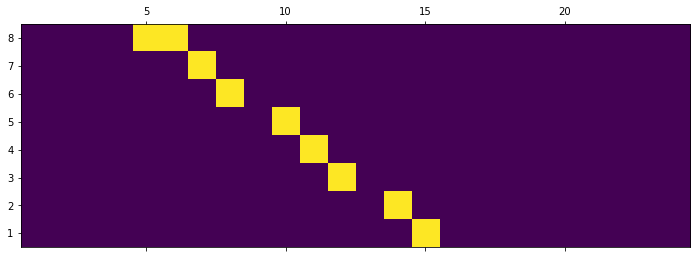

In [127]:
n_layers = 8
n_strips = 24
map = np.zeros((8,24))
for coord in pts_x:
    map[int(coord[1]-1),int(coord[0]-1)]=1
plt.figure()
plt.matshow(map,origin='lower',extent=[0.5, 0.5+n_strips, 0.5, 0.5+n_layers])

In [128]:
# findneighbours(center, candidates)
def findneighbours(center, candidates):
    neighbours = []
    for i in range(len(candidates)):
        for shift in [-1,1]:
            if candidates[i] == [center[0],center[1]+shift] or candidates[i] == [center[0]+shift, center[1]]:  #center[0] - X coordinate and center[1] - Z coordinate
                neighbours.append(candidates[i])
    return neighbours

In [129]:
# hits=[]
# hits.append(pts_x)
# while len(hits)!=0:
#   cluster=[]
#   rootpoint=hits[0]
#   cluster.append(rootpoint)
#   hits.remove(rootpoint)
#   neighbours=[]
hits = []
hits += pts_x #+= this is hits = hits + pts_x
# rootpoint = hits[0]
# print(rootpoint)
while len(hits) != 0:
    cluster = []
    rootpoint = hits[0]
    cluster.append(rootpoint)
    hits.remove(rootpoint)
    neighbours = []
    neighbours = findneighbours(rootpoint, hits)
    while len(neighbours)!=0:
#         newcenter = []
        newcenter = neighbours[0]
        cluster.append(newcenter)
        neighbours.remove(newcenter)
        hits.remove(newcenter)
        neighbours = neighbours + findneighbours(newcenter,hits) #no need bc we have to remove neighb of neighb from hits
#         newcenter_neighbours=findneighbours(newcenter, hits)
#         hits.remove(newcenter_neighbours)
#         neighbours.append(newcenter_neighbours) 
        
#     if len(neighbours) == 0:
#         cluster.remove(rootpoint)
#     else:
#         cluster.append(neighbours)




    if len(cluster)>1:
        print(cluster)
    
#     print(neighbours)



[[5, 8], [6, 8]]


In [130]:
test1 = [[5,3],[2,3],[1,2]]
test2 = [[2,2],[1,3],[2,1]]
test1 = test1+test2
print(test1)

[[5, 3], [2, 3], [1, 2], [2, 2], [1, 3], [2, 1]]


In [131]:
# findneighbours(pts_x[-1],pts_x)

In [132]:
pts_test=[[1,2],[1,0],[0,1],[4,1]]   #test of findneighbours function
centerpoint=[1,1]
findneighbours(centerpoint,pts_test)

[[1, 2], [1, 0], [0, 1]]

In [133]:
class clusters:
    def __init__(self,points):
        self.pts=points
        self.l=len(points)

In [134]:
hits=[]
hits+=pts_x
outlist=[]
while len(hits)!=0:
    cluster=[]
    rootpoint=hits[0]
    cluster.append(rootpoint)
    hits.remove(rootpoint)
    neighbours=[]
    neighbours+=findneighbours(rootpoint,hits)
    #cluster+=neighbours
    #hits=del_list(hits,neighbours)
    while len(neighbours)!=0:
        newcenter=neighbours[0]
        hits.remove(newcenter)
        neighbours.remove(newcenter)
        cluster.append(newcenter)
        neighbours+=findneighbours(newcenter,hits)
    
    if len(cluster)>1:
        x=clusters(cluster)
        outlist.append(x)
    

In [135]:
for i in range(len(outlist)):
    print(outlist[i].pts)

[[5, 8], [6, 8]]


In [136]:
print(outlist[0].pts)

[[5, 8], [6, 8]]
